In [43]:
#installs
!pip install xlrd
!pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv

In [45]:
#methods
def read_oscilloscope_csv_data(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  fid = open(filename,'r')
  lines = fid.readlines()
  fid.close()
  line2 = lines[1].split(',')
  
  t_start = np.float64(line2[3])
  t_step = np.float64(line2[4])
  
  t = np.linspace(0,0,len(lines)-2)
  ch1 = t.copy()
  ch2 = t.copy()
  for n in range(2,len(lines)):
    line = lines[n].split(',')
    t[n-2] = np.float64(line[0])*t_step+t_start
    ch1[n-2] = np.float64(line[1])
    ch2[n-2] = np.float64(line[2])
  return t,ch1,ch2

def sinusfunct(x, a, b, phi, c):
    return (a*np.sin(b*x+phi) +c)

def logreg(x, a, b, c):
  return a/(1+b*np.exp(c*x))

def quadradic(x, a, b, c):
  return a*np.power(x,2) + b*x + c

def line(x, a, b):
  return a*x + b

def daten_fitten(funct, x_data, y_data, genauigkeit, p): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min(x_data), max(x_data), genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

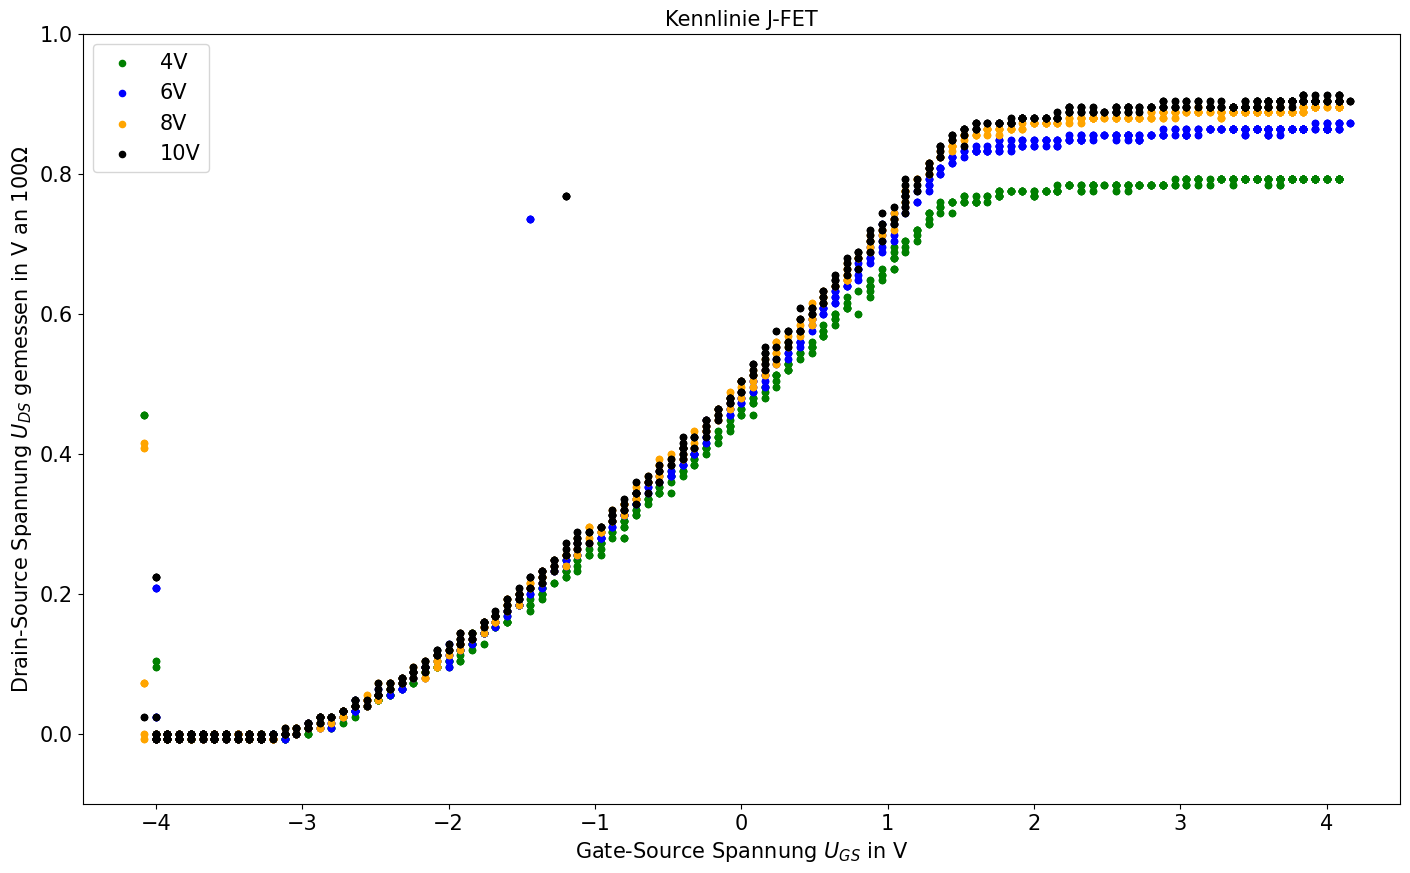

4v_left:
Fitparameter
[0.01754222 0.20394723 0.45112842]
zugehörige Uncertainty
[0.00022891 0.00050088 0.00049502]
4v_right:
Fitparameter
[0.00897472 0.75876298]
zugehörige Uncertainty
[0.00023132 0.00073456]
[1.401] [0.77129038]
Nullstelle:  [-2.972] ,[0]


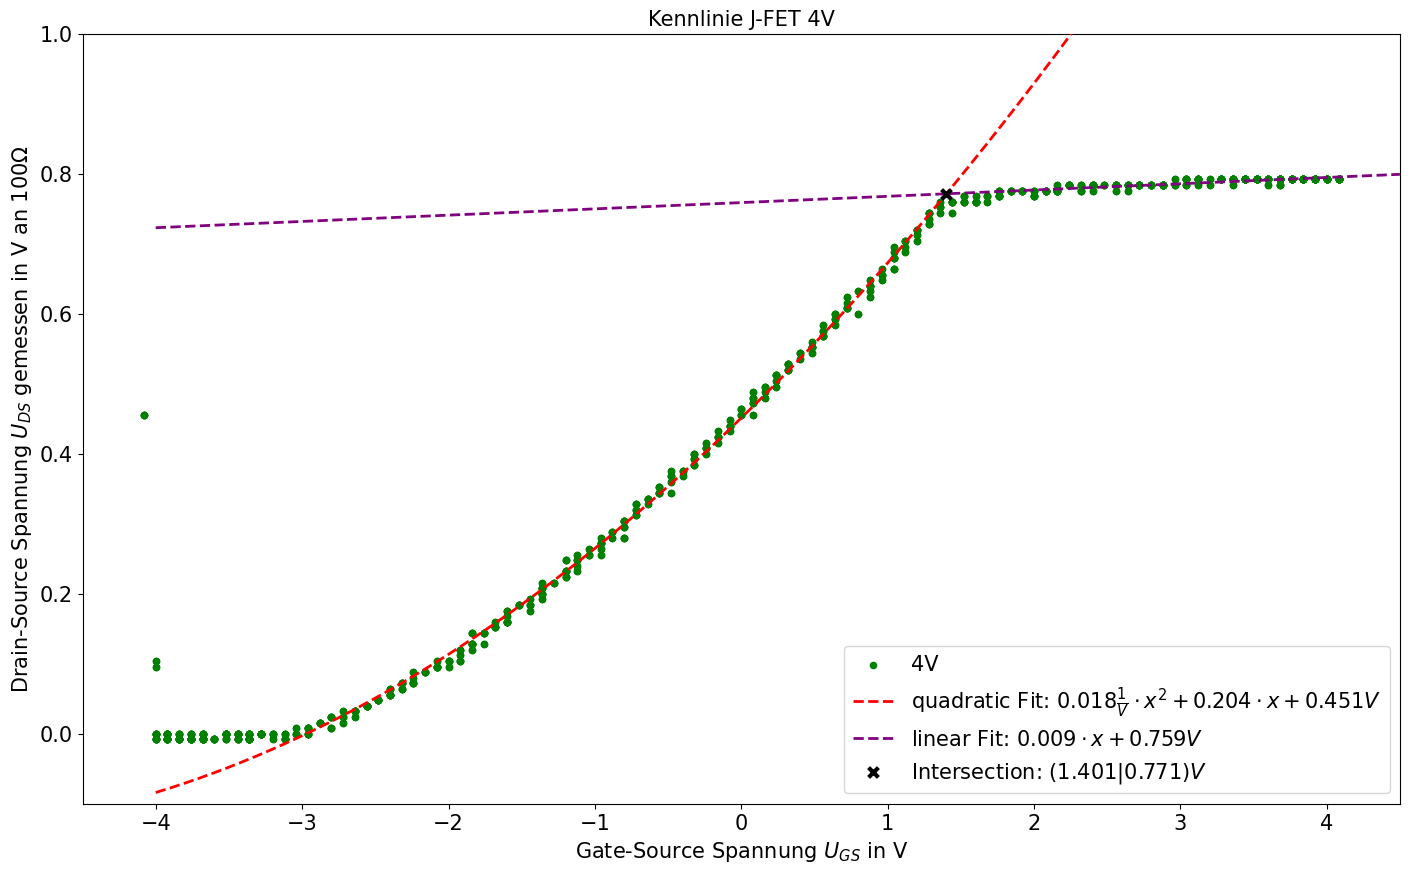

6v_left:
Fitparameter
[0.01805932 0.21404111 0.4814203 ]
zugehörige Uncertainty
[0.00116289 0.00258205 0.00254022]
6v_right:
Fitparameter
[0.01150349 0.8221192 ]
zugehörige Uncertainty
[0.00027816 0.00088054]
[1.485] [0.83909622]
Nullstelle:  [-3.018] ,[0]


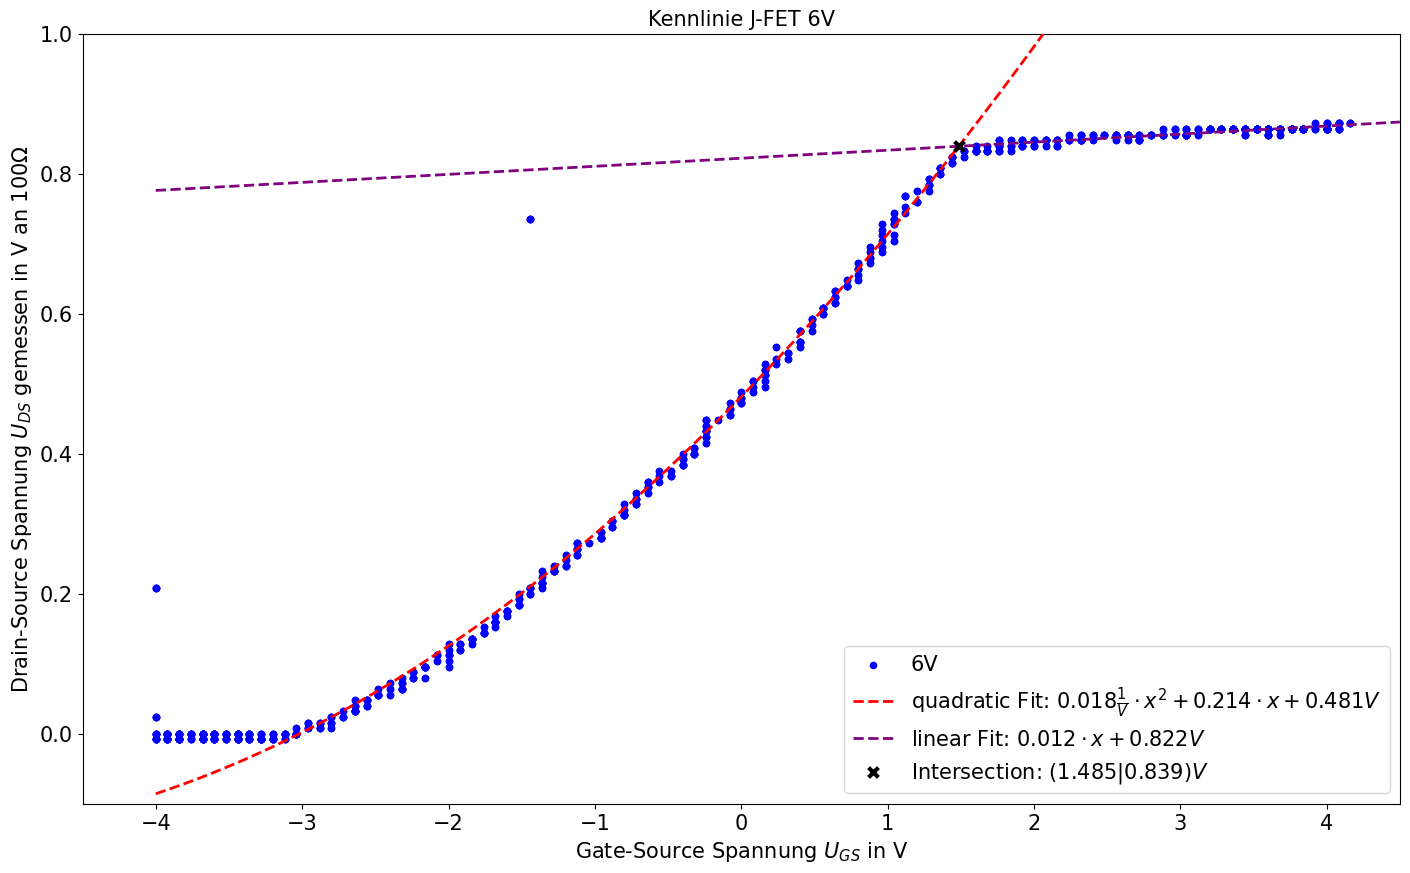

8v_left:
Fitparameter
[0.02045696 0.22347619 0.4886865 ]
zugehörige Uncertainty
[0.0002171  0.00047911 0.00046978]
8v_right:
Fitparameter
[0.01240711 0.84654291]
zugehörige Uncertainty
[0.0002651  0.00083713]
[1.482] [0.86480833]
Nullstelle:  [-3.024] ,[0]


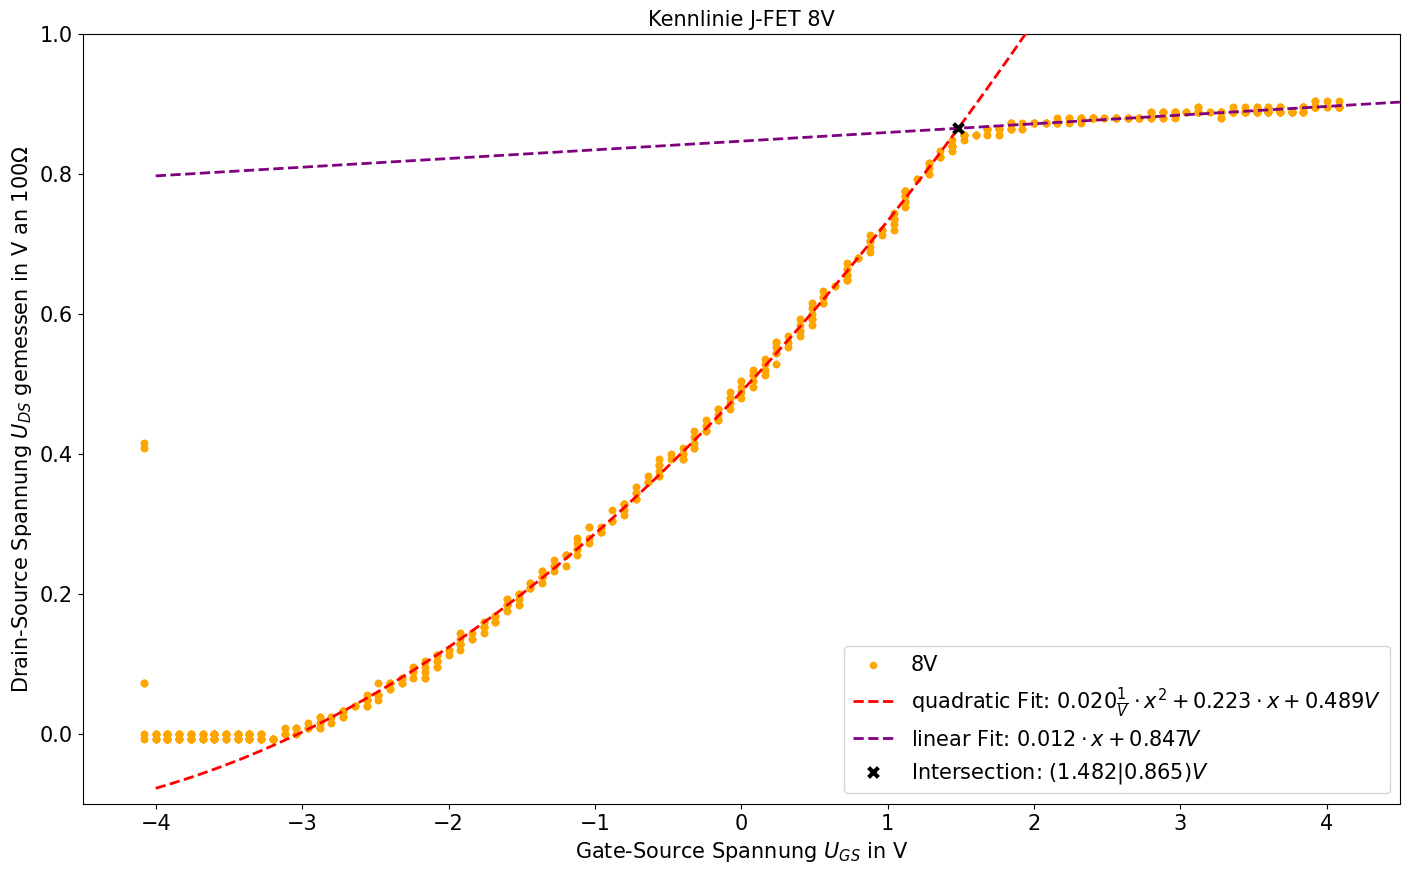

10v_left:
Fitparameter
[0.01804456 0.21877588 0.49798312]
zugehörige Uncertainty
[0.00113558 0.00248799 0.00247275]
10v_right:
Fitparameter
[0.01217856 0.85786913]
zugehörige Uncertainty
[0.00031286 0.00099395]
[1.535] [0.87632114]
Nullstelle:  [-3.037] ,[0]


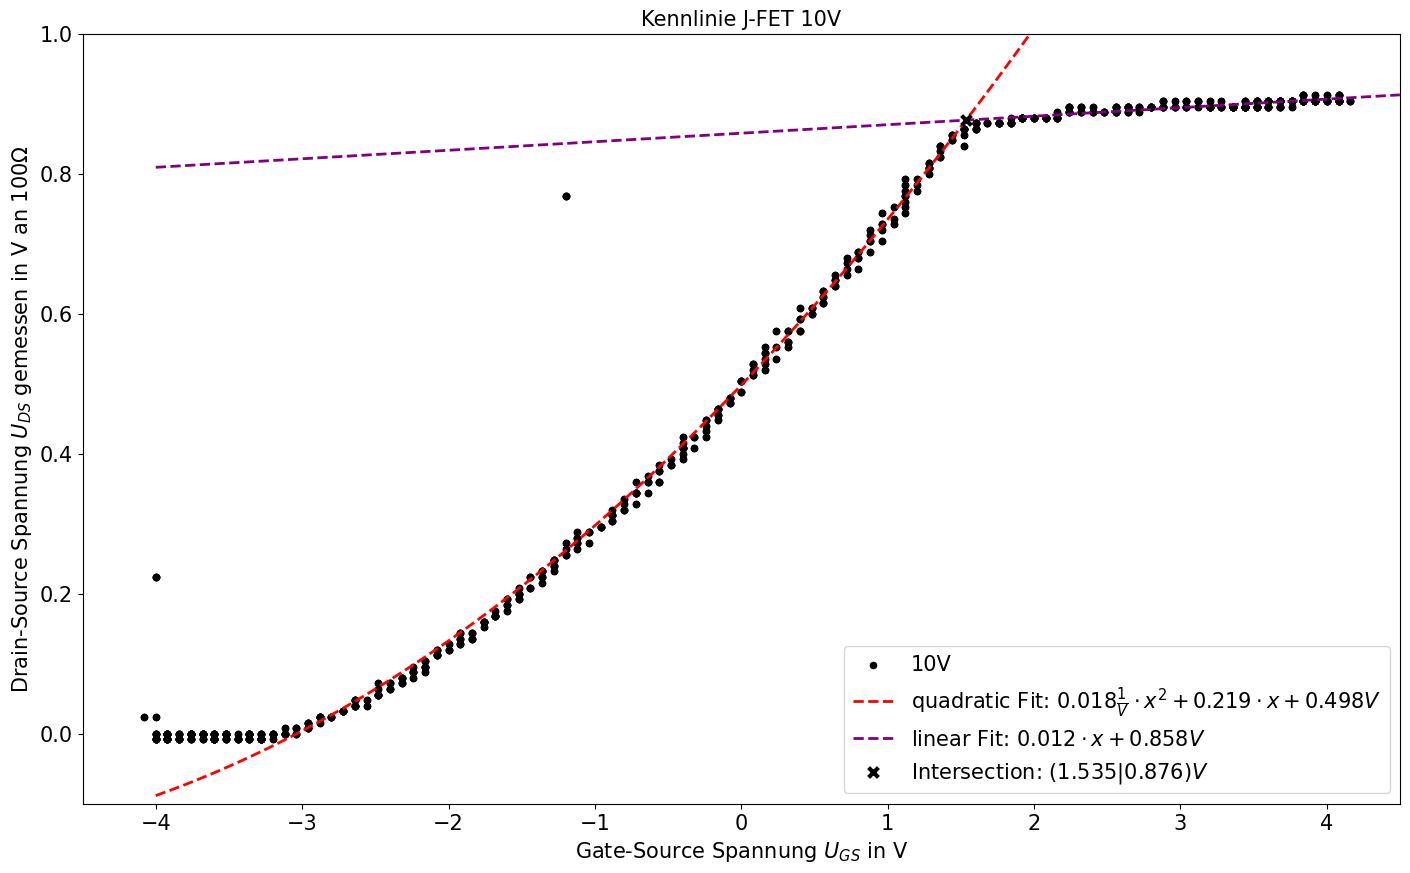

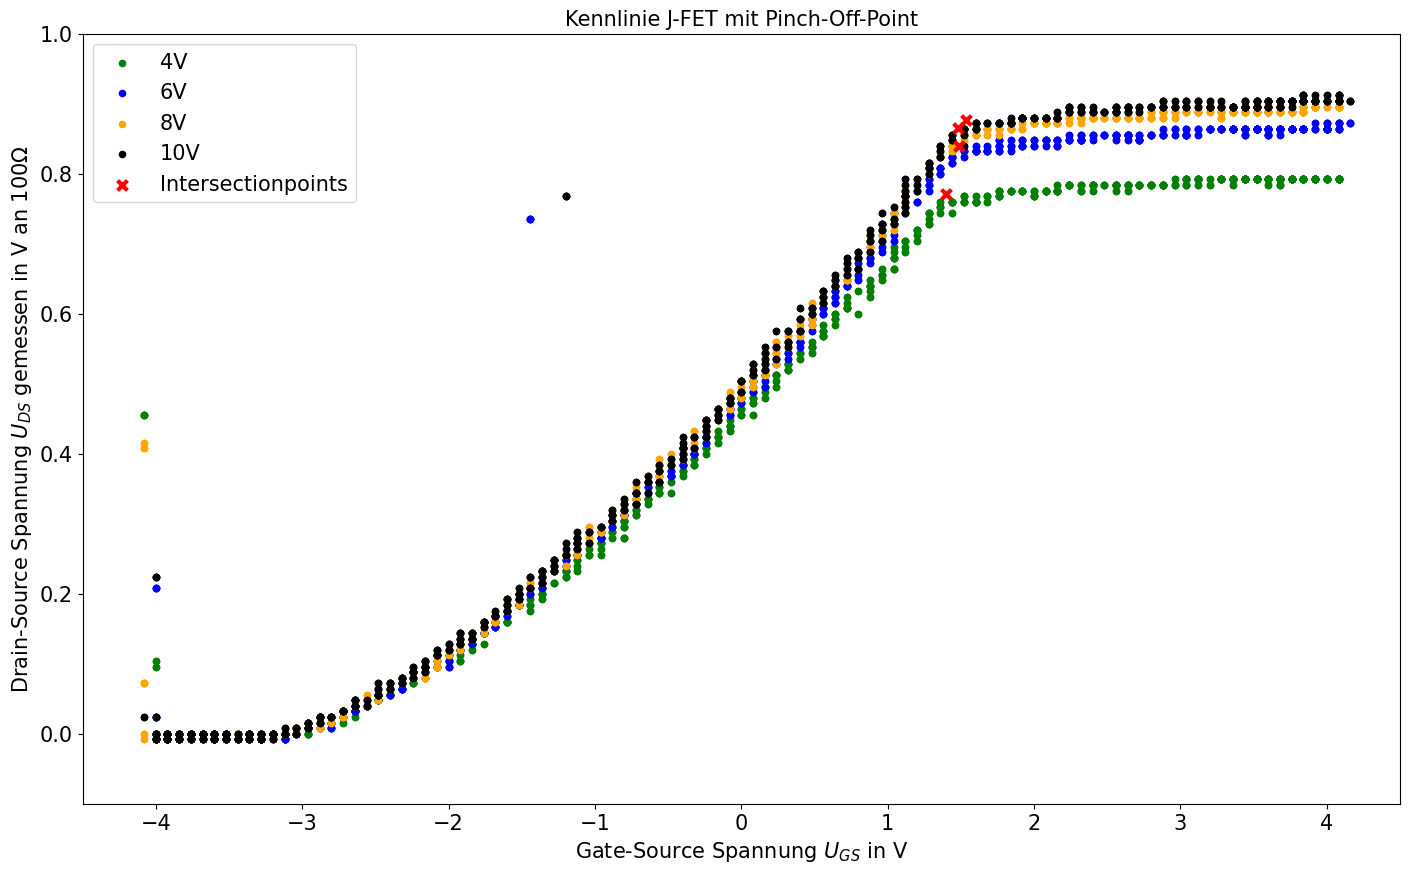

In [76]:
#Task1
#read in data
[t_4v, ch1_4v, ch2_4v] = read_oscilloscope_csv_data('4vfet.csv')
[t_7vb, ch1_7vb, ch2_7vb] = read_oscilloscope_csv_data('7vfet.csv')
[t_10vb, ch1_10vb, ch2_10vb] = read_oscilloscope_csv_data('10vfet.csv')
[t_6v, ch1_6v, ch2_6v] = read_oscilloscope_csv_data('1_6v.csv')
[t_8v, ch1_8v, ch2_8v] = read_oscilloscope_csv_data('1_8v.csv')
[t_10v, ch1_10v, ch2_10v] = read_oscilloscope_csv_data('1_10v.csv')

#plot data
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(ch1_4v, ch2_4v, label = '4V', color='green', s=20, zorder= 5)
#plt.scatter(ch1_7vb, ch2_7vb, label = '7Vb', color='pink', s=20, zorder= 5)
#plt.scatter(ch1_10vb, ch2_10vb, label = '10Vb', color='purple', s=20, zorder= 5)
plt.scatter(ch1_6v, ch2_6v, label = '6V', color='blue', s=20, zorder= 5)
plt.scatter(ch1_8v, ch2_8v, label = '8V', color='orange', s=20, zorder= 5)
plt.scatter(ch1_10v, ch2_10v, label = '10V', color='black', s=20, zorder= 5)

# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(fontsize=15)
plt.show()

plt.subplots(1,1,figsize=(17, 10));
#fit data 4V
plt.scatter(ch1_4v, ch2_4v, label = '4V', color='green', s=20, zorder= 5)
idx_left1 = np.where(ch1_4v < 1.4)[0]
idx_left2 = np.where(ch1_4v > -3.25)[0]
idx_left = []
for i in idx_left1:
    if i in idx_left2:
        idx_left.append(i)
ch1_4v_left = ch1_4v[idx_left]
ch2_4v_left = ch2_4v[idx_left]

print('4v_left:')
pars, stdevs, xfit, yfit = daten_fitten(quadradic, ch1_4v_left, ch2_4v_left, 100, [1, 1, 1])

x = np.arange(-4, 4.5, 0.001)
f_4v = pars[0]*np.power(x,2) + x*pars[1] + pars[2]
plt.plot(x, f_4v, '--', color='red', label = r'quadratic Fit: $%.3f \frac{1}{V}\cdot x^2 + %.3f \cdot x + %.3f V$' %(pars[0],pars[1],pars[2]), zorder= 6, linewidth=2)

idx_right = np.where(ch1_4v > 1.6)[0]
ch1_4v_right = ch1_4v[idx_right]
ch2_4v_right = ch2_4v[idx_right]

print('4v_right:')
pars, stdevs, xfit, yfit = daten_fitten(line, ch1_4v_right, ch2_4v_right, 100, [1, 1])

g_4v = pars[0]*x + pars[1]
plt.plot(x, g_4v, '--', color='purple', label = r'linear Fit: $%.3f \cdot x + %.3f V$' %(pars[0],pars[1]), zorder= 6, linewidth=2)

idx_4v = np.argwhere(np.diff(np.sign(f_4v - g_4v))).flatten()
print(x[idx_4v], f_4v[idx_4v])
plt.scatter(x[idx_4v], f_4v[idx_4v], color='black', marker='x', s=50, zorder= 7, linewidth=3, label = r'Intersection: $(%.3f|%.3f)V$' %(x[idx_4v], f_4v[idx_4v]))

idx_4v_0 = np.argwhere(np.diff(np.sign(f_4v - 0))).flatten()
print('Nullstelle: ' ,x[idx_4v_0], ',[0]')

# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET 4V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

plt.subplots(1,1,figsize=(17, 10));
#fit data 6V
plt.scatter(ch1_6v, ch2_6v, label = '6V', color='blue', s=20, zorder= 5)
idx_left1 = np.where(ch1_6v < 1.4)[0]
idx_left2 = np.where(ch1_6v > -3.25)[0]
idx_left = []
for i in idx_left1:
    if i in idx_left2:
        idx_left.append(i)
ch1_6v_left = ch1_6v[idx_left]
ch2_6v_left = ch2_6v[idx_left]

print('6v_left:')
pars, stdevs, xfit, yfit = daten_fitten(quadradic, ch1_6v_left, ch2_6v_left, 100, [1, 1, 1])

x = np.arange(-4, 4.5, 0.001)
f_6v = pars[0]*np.power(x,2) + x*pars[1] + pars[2]
plt.plot(x, f_6v, '--', color='red', label = r'quadratic Fit: $%.3f \frac{1}{V}\cdot x^2 + %.3f \cdot x + %.3f V$' %(pars[0],pars[1],pars[2]), zorder= 6, linewidth=2)

idx_right = np.where(ch1_6v > 1.6)[0]
ch1_6v_right = ch1_6v[idx_right]
ch2_6v_right = ch2_6v[idx_right]

print('6v_right:')
pars, stdevs, xfit, yfit = daten_fitten(line, ch1_6v_right, ch2_6v_right, 100, [1, 1])

g_6v = pars[0]*x + pars[1]
plt.plot(x, g_6v, '--', color='purple', label = r'linear Fit: $%.3f \cdot x + %.3f V$' %(pars[0],pars[1]), zorder= 6, linewidth=2)

idx_6v = np.argwhere(np.diff(np.sign(f_6v - g_6v))).flatten()
print(x[idx_6v], f_6v[idx_6v])
plt.scatter(x[idx_6v], f_6v[idx_6v], color='black', marker='x', s=50, zorder= 7, linewidth=3, label = r'Intersection: $(%.3f|%.3f)V$' %(x[idx_6v], f_6v[idx_6v]))

idx_6v_0 = np.argwhere(np.diff(np.sign(f_6v - 0))).flatten()
print('Nullstelle: ' ,x[idx_6v_0], ',[0]')

# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET 6V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

plt.subplots(1,1,figsize=(17, 10));
#fit data 8V
plt.scatter(ch1_8v, ch2_8v, label = '8V', color='orange', s=20, zorder= 5)
idx_left1 = np.where(ch1_8v < 1.4)[0]
idx_left2 = np.where(ch1_8v > -3.25)[0]
idx_left = []
for i in idx_left1:
    if i in idx_left2:
        idx_left.append(i)
ch1_8v_left = ch1_8v[idx_left]
ch2_8v_left = ch2_8v[idx_left]

print('8v_left:')
pars, stdevs, xfit, yfit = daten_fitten(quadradic, ch1_8v_left, ch2_8v_left, 100, [1, 1, 1])

x = np.arange(-4, 4.5, 0.001)
f_8v = pars[0]*np.power(x,2) + x*pars[1] + pars[2]
plt.plot(x, f_8v, '--', color='red', label = r'quadratic Fit: $%.3f \frac{1}{V}\cdot x^2 + %.3f \cdot x + %.3f V$' %(pars[0],pars[1],pars[2]), zorder= 6, linewidth=2)

idx_right = np.where(ch1_8v > 1.6)[0]
ch1_8v_right = ch1_8v[idx_right]
ch2_8v_right = ch2_8v[idx_right]

print('8v_right:')
pars, stdevs, xfit, yfit = daten_fitten(line, ch1_8v_right, ch2_8v_right, 100, [1, 1])

g_8v = pars[0]*x + pars[1]
plt.plot(x, g_8v, '--', color='purple', label = r'linear Fit: $%.3f \cdot x + %.3f V$' %(pars[0],pars[1]), zorder= 6, linewidth=2)

idx_8v = np.argwhere(np.diff(np.sign(f_8v - g_8v))).flatten()
print(x[idx_8v], f_8v[idx_8v])
plt.scatter(x[idx_8v], f_8v[idx_8v], color='black', marker='x', s=50, zorder= 7, linewidth=3, label = r'Intersection: $(%.3f|%.3f)V$' %(x[idx_8v], f_8v[idx_8v]))

idx_8v_0 = np.argwhere(np.diff(np.sign(f_8v - 0))).flatten()
print('Nullstelle: ' ,x[idx_8v_0], ',[0]')

# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET 8V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

plt.subplots(1,1,figsize=(17, 10));
#fit data 10V
plt.scatter(ch1_10v, ch2_10v, label = '10V', color='black', s=20, zorder= 5)
idx_left1 = np.where(ch1_10v < 1.4)[0]
idx_left2 = np.where(ch1_10v > -3.25)[0]
idx_left = []
for i in idx_left1:
    if i in idx_left2:
        idx_left.append(i)
ch1_10v_left = ch1_10v[idx_left]
ch2_10v_left = ch2_10v[idx_left]

print('10v_left:')
pars, stdevs, xfit, yfit = daten_fitten(quadradic, ch1_10v_left, ch2_10v_left, 100, [1, 1, 1])

x = np.arange(-4, 4.5, 0.001)
f_10v = pars[0]*np.power(x,2) + x*pars[1] + pars[2]
plt.plot(x, f_10v, '--', color='red', label = r'quadratic Fit: $%.3f \frac{1}{V}\cdot x^2 + %.3f \cdot x + %.3f V$' %(pars[0],pars[1],pars[2]), zorder= 6, linewidth=2)

idx_right = np.where(ch1_10v > 1.6)[0]
ch1_10v_right = ch1_10v[idx_right]
ch2_10v_right = ch2_10v[idx_right]

print('10v_right:')
pars, stdevs, xfit, yfit = daten_fitten(line, ch1_10v_right, ch2_10v_right, 100, [1, 1])

g_10v = pars[0]*x + pars[1]
plt.plot(x, g_10v, '--', color='purple', label = r'linear Fit: $%.3f \cdot x + %.3f V$' %(pars[0],pars[1]), zorder= 6, linewidth=2)

idx_10v = np.argwhere(np.diff(np.sign(f_10v - g_10v))).flatten()
print(x[idx_10v], f_10v[idx_10v])
plt.scatter(x[idx_10v], f_10v[idx_10v], color='black', marker='x', s=50, zorder= 7, linewidth=3, label = r'Intersection: $(%.3f|%.3f)V$' %(x[idx_10v], f_10v[idx_10v]))

idx_10v_0 = np.argwhere(np.diff(np.sign(f_10v - 0))).flatten()
print('Nullstelle: ' ,x[idx_10v_0], ',[0]')

# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET 10V', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

#plot data
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(ch1_4v, ch2_4v, label = '4V', color='green', s=20, zorder= 5)
#plt.scatter(ch1_7v, ch2_7v, label = '7V', color='blue', s=20, zorder= 5)
#plt.scatter(ch1_10v, ch2_10v, label = '10V', color='orange', s=20, zorder= 5)
plt.scatter(ch1_6v, ch2_6v, label = '6V', color='blue', s=20, zorder= 5)
plt.scatter(ch1_8v, ch2_8v, label = '8V', color='orange', s=20, zorder= 5)
plt.scatter(ch1_10v, ch2_10v, label = '10V', color='black', s=20, zorder= 5)

plt.scatter(x[idx_4v], f_4v[idx_4v], color='red', marker='x', s=50, zorder= 7, linewidth=3, label = 'Intersectionpoints')
plt.scatter(x[idx_6v], f_6v[idx_6v], color='red', marker='x', s=50, zorder= 7, linewidth=3)
plt.scatter(x[idx_8v], f_8v[idx_8v], color='red', marker='x', s=50, zorder= 7, linewidth=3)
plt.scatter(x[idx_10v], f_10v[idx_10v], color='red', marker='x', s=50, zorder= 7, linewidth=3)


# Add axis labels and a title
plt.xlabel(r'Gate-Source Spannung $U_{GS}$ in V', fontsize=15)
plt.ylabel(r'Drain-Source Spannung $U_{DS}$ gemessen in V an 100Ω', fontsize=15)
plt.title('Kennlinie J-FET mit Pinch-Off-Point', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.axis([-4.5, 4.5, -0.1, 1]) #Achsenanpassung
# Display the plot
plt.legend(fontsize=15)
plt.show()


a10-1:
Fitparameter
[ 1.00125274e+00  6.28341816e+03 -1.01475082e-03 -1.21563246e-03]
zugehörige Uncertainty
[3.71147817e-04 8.46111255e-01 3.33577764e-04 2.50626427e-04]
a10-2:
Fitparameter
[-9.96556458e-01 -6.28117925e+03  3.14295254e+00  1.56316715e-02]
zugehörige Uncertainty
[3.75900030e-04 8.60987848e-01 3.39437088e-04 2.53822465e-04]


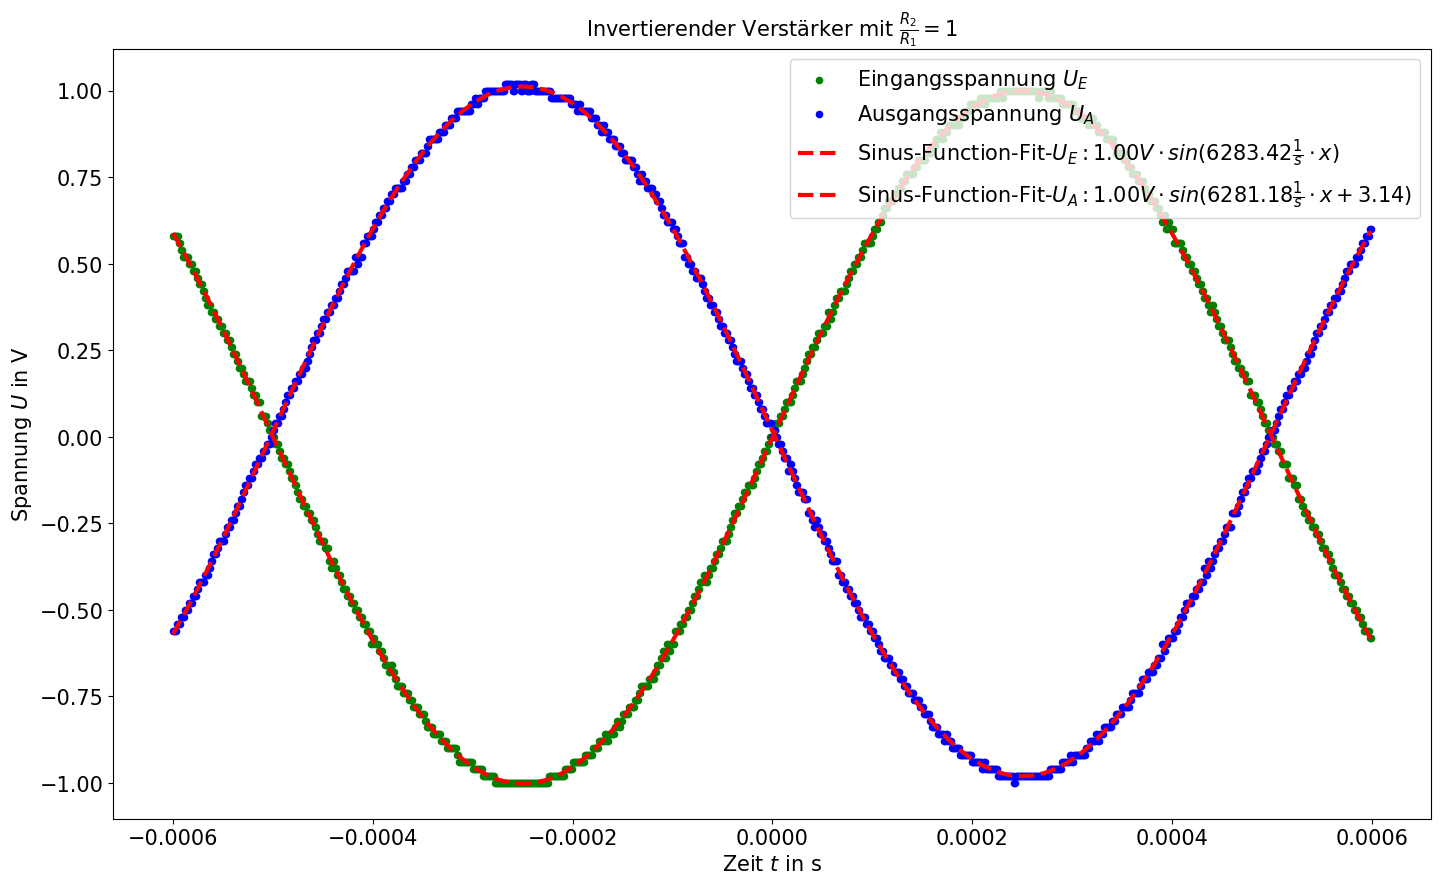

a100-1:
Fitparameter
[ 1.00174399e+00  6.28533177e+03  2.92557591e-03 -2.83395515e-03]
zugehörige Uncertainty
[3.44494844e-04 7.84957209e-01 3.09477329e-04 2.32637185e-04]
a100-2:
Fitparameter
[ 9.85816158e+00 -6.28333291e+03  1.78914902e-03 -2.27537644e-02]
zugehörige Uncertainty
[3.89745888e-03 9.02425375e-01 3.55780878e-04 2.63184805e-03]


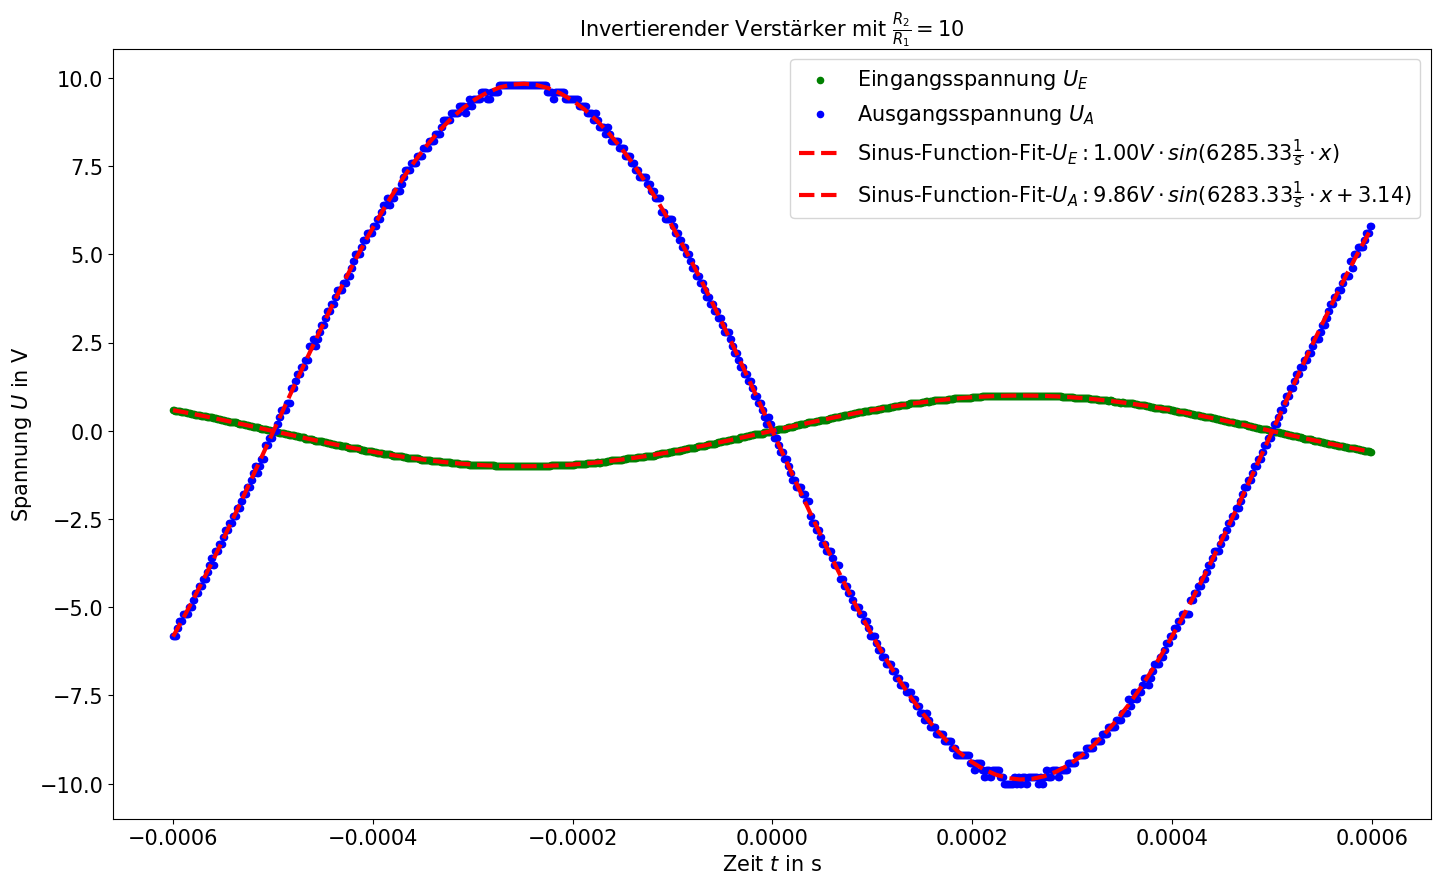

b10-1:
Fitparameter
[ 1.00719343e+00  6.28287153e+03 -1.47216430e-03 -3.55768353e-03]
zugehörige Uncertainty
[3.49594737e-04 7.92277661e-01 3.12352319e-04 2.36069317e-04]
b10-2:
Fitparameter
[ 2.00676335e+00  6.28330349e+03 -3.00404506e-03 -4.72303485e-03]
zugehörige Uncertainty
[7.06398408e-04 8.03492563e-01 3.16775923e-04 4.77011800e-04]


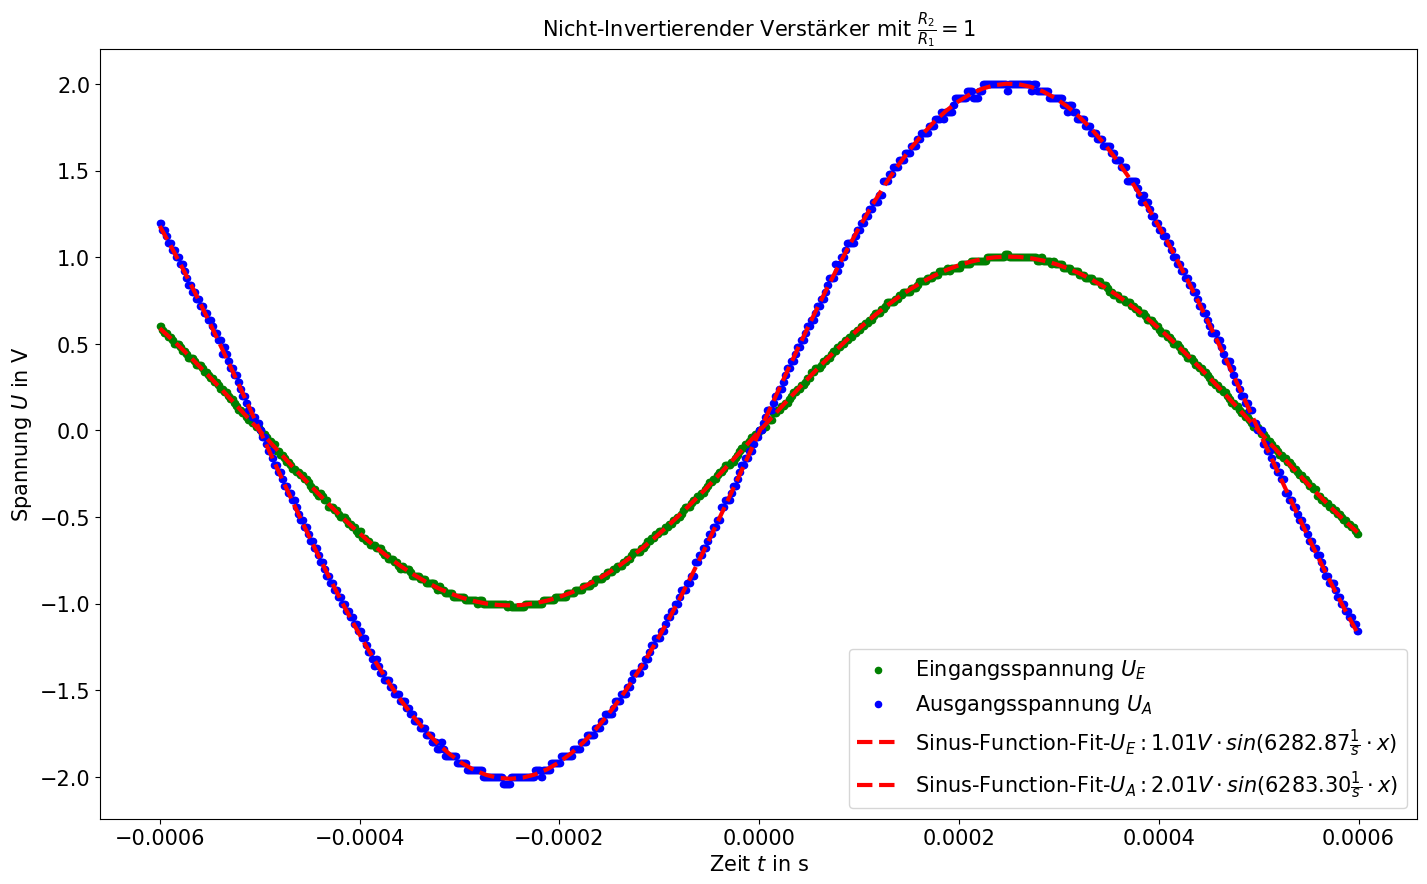

b100-1:
Fitparameter
[ 1.00776184e+00  6.28363938e+03 -1.27187176e-03 -1.56037715e-03]
zugehörige Uncertainty
[3.54245492e-04 8.02363175e-01 3.16333529e-04 2.39213599e-04]
b100-2:
Fitparameter
[ 1.09538292e+01  6.28414718e+03 -3.56058612e-03 -2.34545144e-02]
zugehörige Uncertainty
[3.72799833e-03 7.76853137e-01 3.06275145e-04 2.51746703e-03]


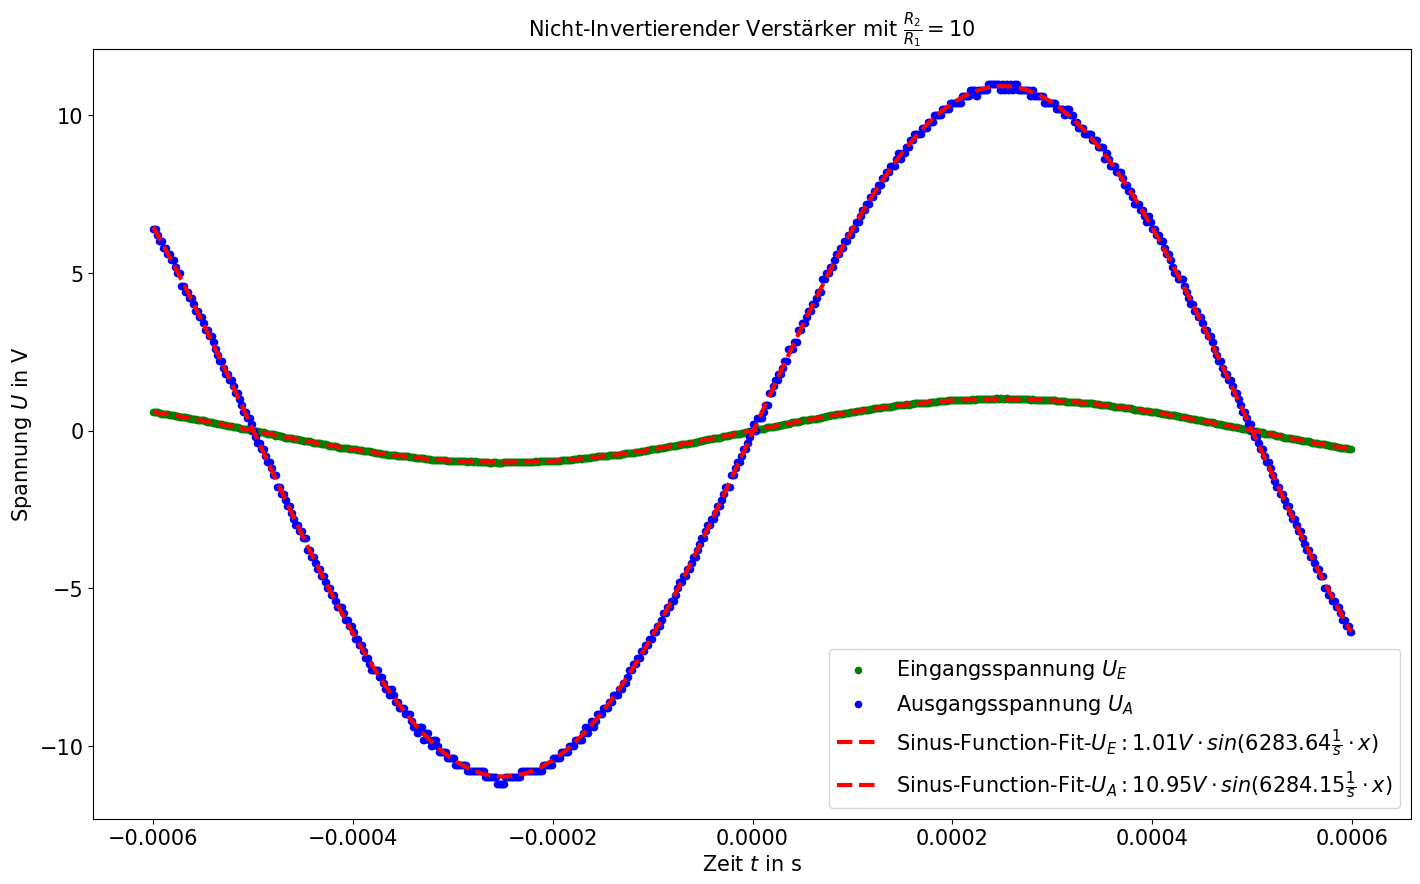

In [50]:
#Task2
#read in data
[t_a10, ch1_a10, ch2_a10] = read_oscilloscope_csv_data('a10.csv')
[t_a100, ch1_a100, ch2_a100] = read_oscilloscope_csv_data('a100.csv')
[t_b10, ch1_b10, ch2_b10] = read_oscilloscope_csv_data('b10.csv')
[t_b100, ch1_b100, ch2_b100] = read_oscilloscope_csv_data('b100.csv')

#plot data a10
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_a10, ch1_a10, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_a10, ch2_a10, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)
print('a10-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_a10, ch1_a10, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)
print('a10-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_a10, ch2_a10, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.2f)$' %(abs(pars[0]),abs(pars[1]),pars[2]), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Invertierender Verstärker mit $\frac{R_{2}}{R_{1}} = 1$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'upper right', fontsize=15).set_zorder(102)
plt.show()

#plot data a100
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_a100, ch1_a100, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_a100, ch2_a100, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)
print('a100-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_a100, ch1_a100, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)
print('a100-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_a100, ch2_a100, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.2f)$' %(pars[0],abs(pars[1]), 3.14), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Invertierender Verstärker mit $\frac{R_{2}}{R_{1}} = 10$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'upper right', fontsize=15).set_zorder(102)
plt.show()

#plot data b10
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_b10, ch1_b10, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_b10, ch2_b10, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)
print('b10-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_b10, ch1_b10, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)
print('b10-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_b10, ch2_b10, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x )$' %(pars[0],pars[1]), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Nicht-Invertierender Verstärker mit $\frac{R_{2}}{R_{1}} = 1$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()

#plot data b100
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_b100, ch1_b100, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_b100, ch2_b100, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)
print('b100-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_a100, ch1_b100, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)
print('b100-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_b100, ch2_b100, 100, [1, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x )$' %(pars[0],pars[1]), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Nicht-Invertierender Verstärker mit $\frac{R_{2}}{R_{1}} = 10$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()

csin-1:
Fitparameter
[ 1.00345457e+00  6.28311797e+03  4.71089227e-02 -2.33001838e-04]
zugehörige Uncertainty
[0.00059607 0.3422482  0.0005934  0.00042105]
csin-2:
Fitparameter
[4.96634728e+00 6.28355241e+03 1.63970231e+00 8.53704358e+00]
zugehörige Uncertainty
[0.00414517 0.48709902 0.00083383 0.00295317]


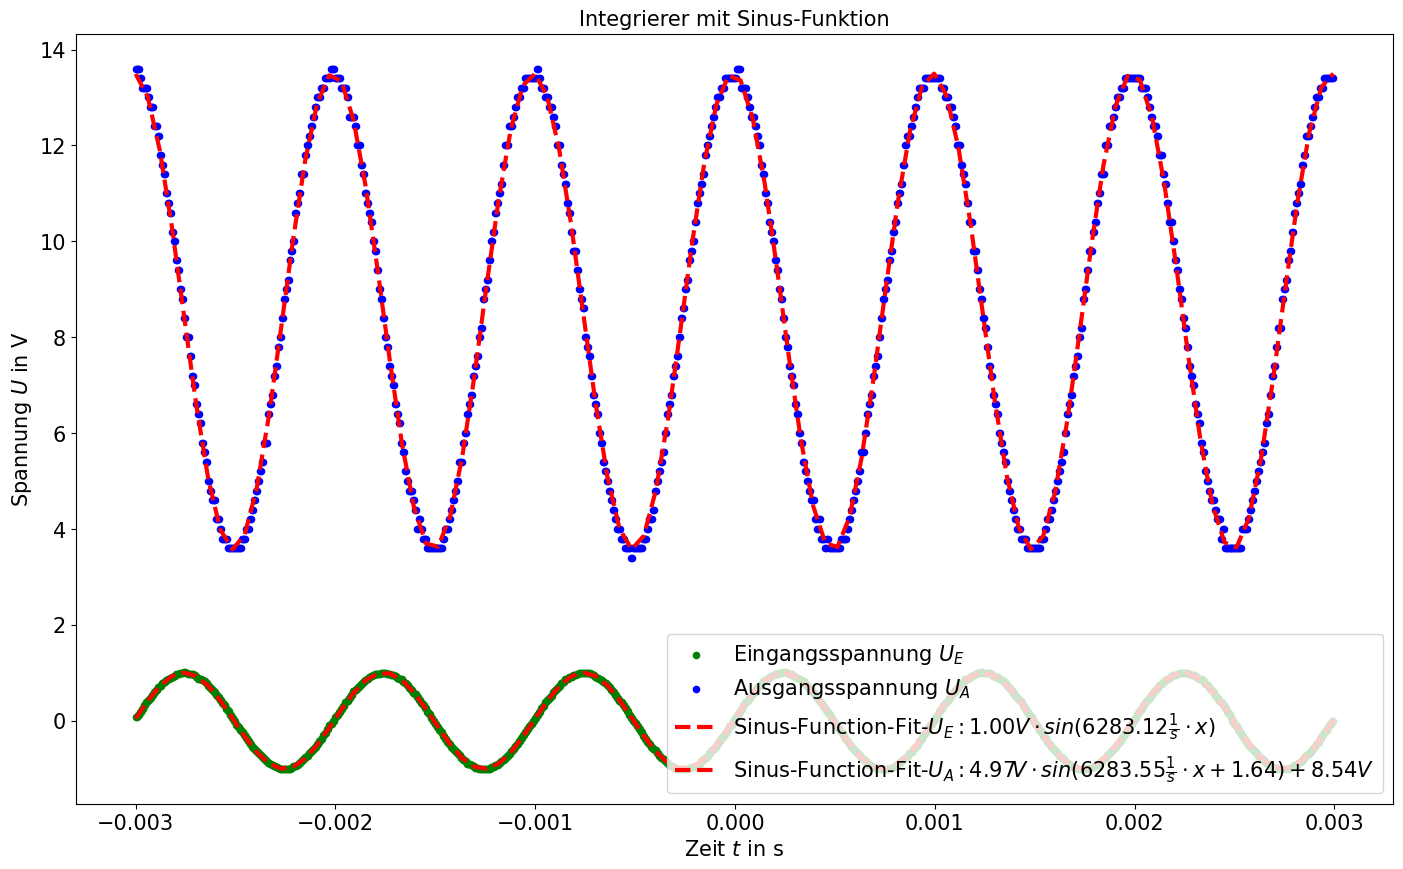

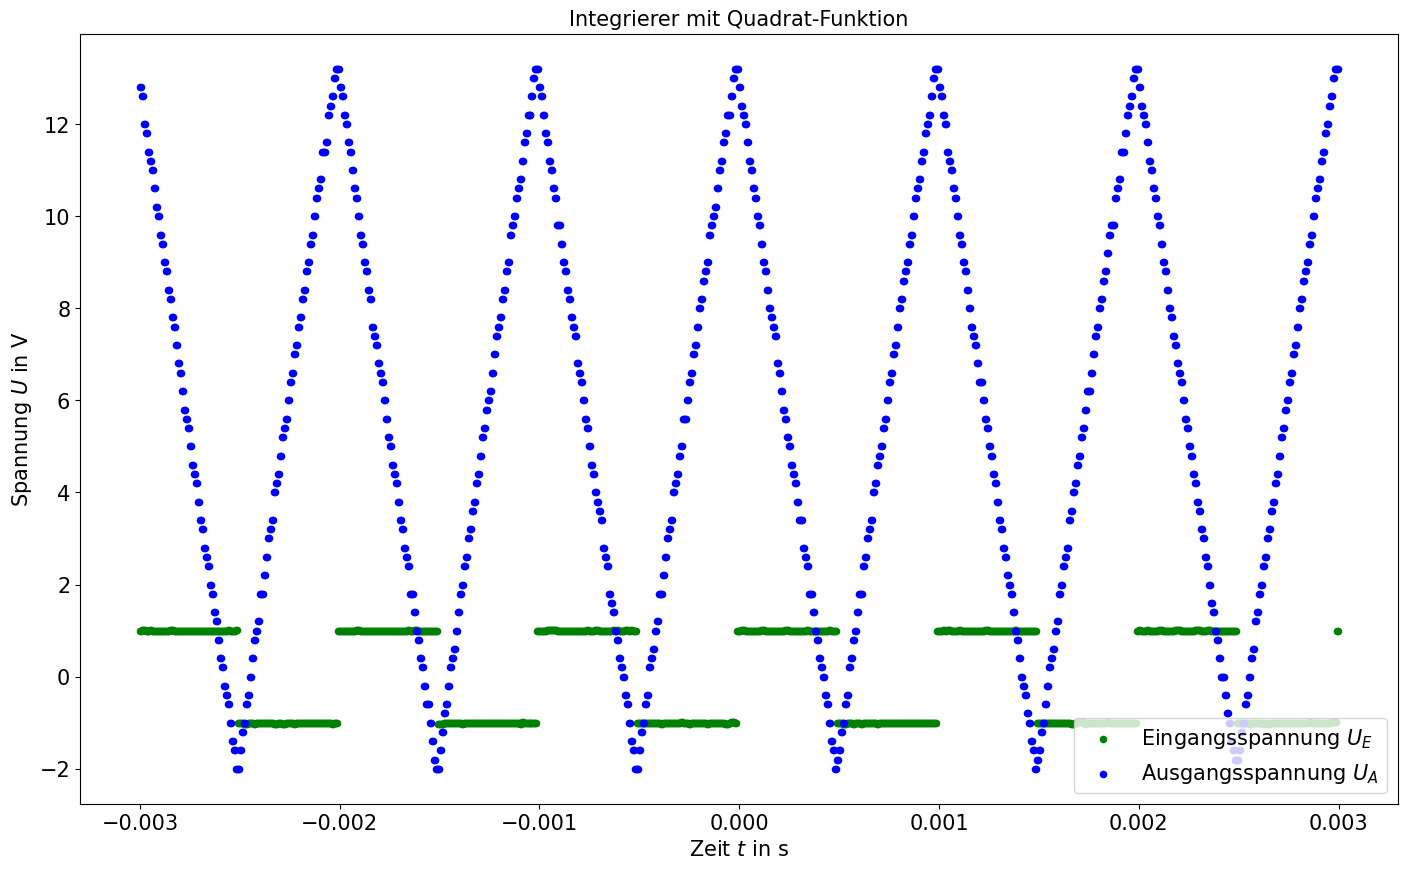

In [56]:
#Task3
#read in data
[t_csin, ch1_csin, ch2_csin] = read_oscilloscope_csv_data('csin.csv')
[t_csq, ch1_csq, ch2_csq] = read_oscilloscope_csv_data('csq.csv')

#plot data csin
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_csin, ch1_csin, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_csin, ch2_csin, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)
print('csin-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_csin, ch1_csin, 100, [1, 6280, 0, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)
print('csin-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_csin, ch2_csin, 100, [5, 6280, 1.6, 9])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.2f) + %.2f V$' %(pars[0],pars[1],pars[2],pars[3]), zorder= 6, linewidth=3)


#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title('Integrierer mit Sinus-Funktion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()

#plot data csq
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_csq, ch1_csq, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_csq, ch2_csq, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)



#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title('Integrierer mit Quadrat-Funktion', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()


tif0-1:
Fitparameter
[ 1.00076991e+00  3.13976699e+04 -2.69032518e-02 -5.66311408e-03]
zugehörige Uncertainty
[1.55960932e-03 8.93329486e+00 1.55288242e-03 1.09859215e-03]
tif0-2:
Fitparameter
[-9.98989482e-01  3.14011191e+04 -2.82614103e-02  2.09329920e-02]
zugehörige Uncertainty
[2.40065234e-03 1.37723515e+01 2.39430996e-03 1.69094366e-03]


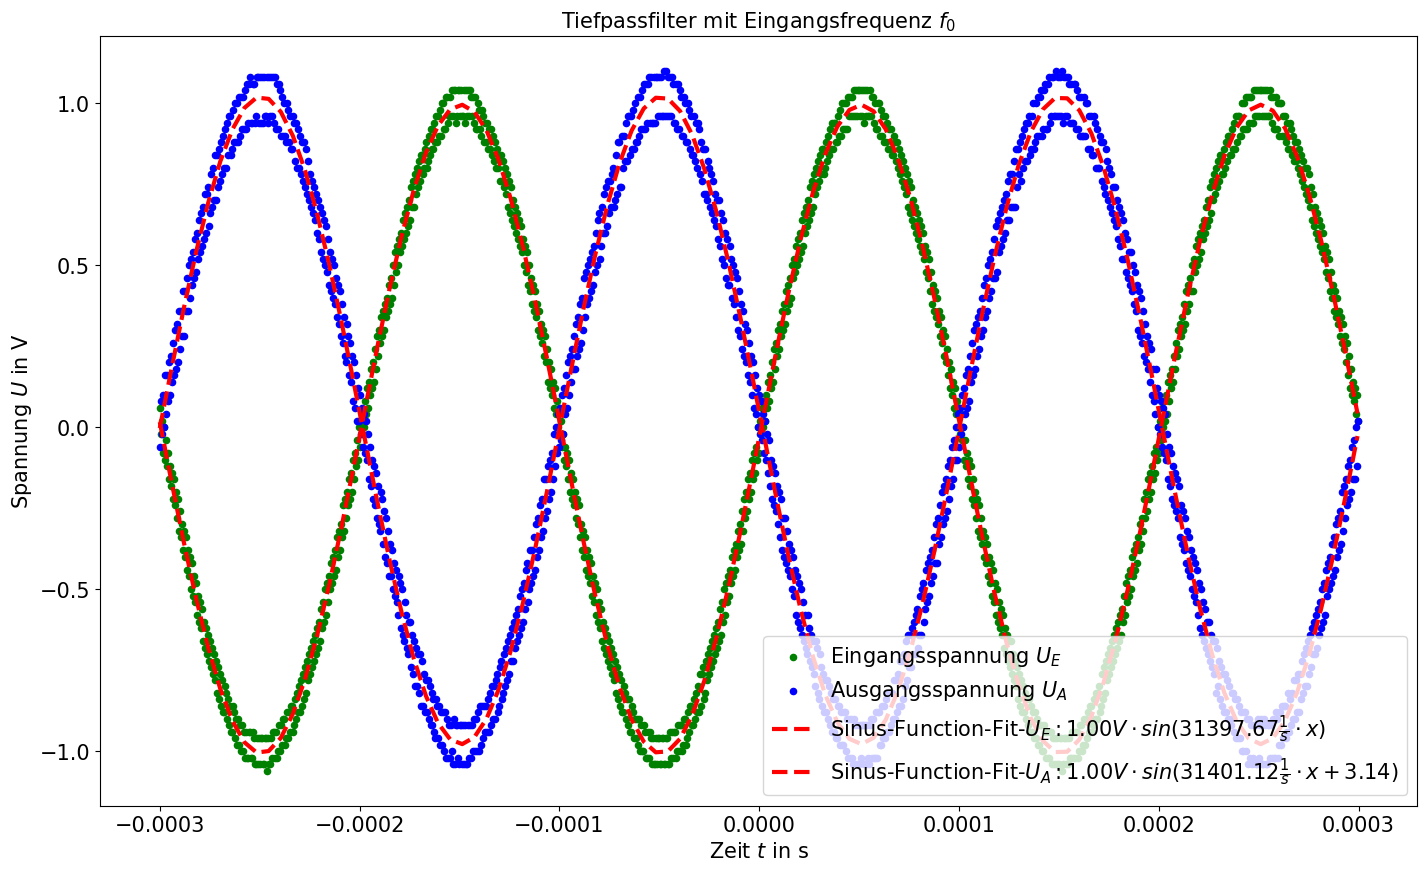

tif01-1:
Fitparameter
[-9.93022562e-01  3.12511648e+03  1.56540358e+00 -4.27271627e-03]
zugehörige Uncertainty
[0.00135991 0.79228527 0.00142277 0.00096012]
tif01-2:
Fitparameter
[9.98131853e-01 3.12519597e+03 1.56603457e+00 1.63095020e-02]
zugehörige Uncertainty
[0.00231982 1.3445416  0.00241464 0.00163781]


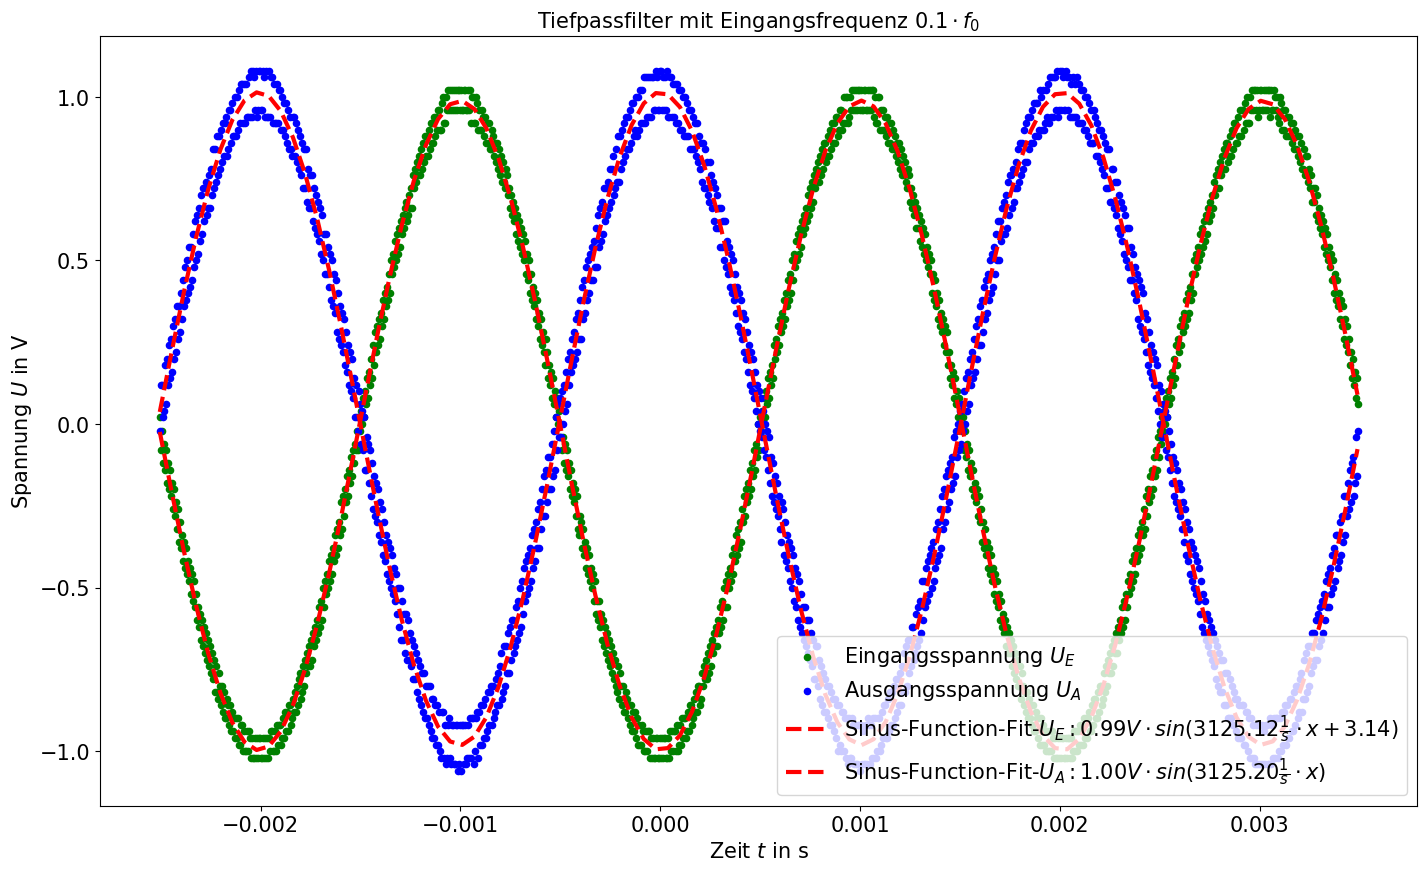

tif10-1:
Fitparameter
[ 9.99744596e-01  3.12506620e+05 -1.07541411e-02  7.48117717e-04]
zugehörige Uncertainty
[1.10654249e-03 6.40327111e+01 1.10800274e-03 7.81204556e-04]
tif10-2:
Fitparameter
[1.04157543e-01 3.13255285e+05 1.68429197e+00 1.95178028e-02]
zugehörige Uncertainty
[9.95801457e-04 5.73436924e+02 9.49258596e-03 7.25380192e-04]


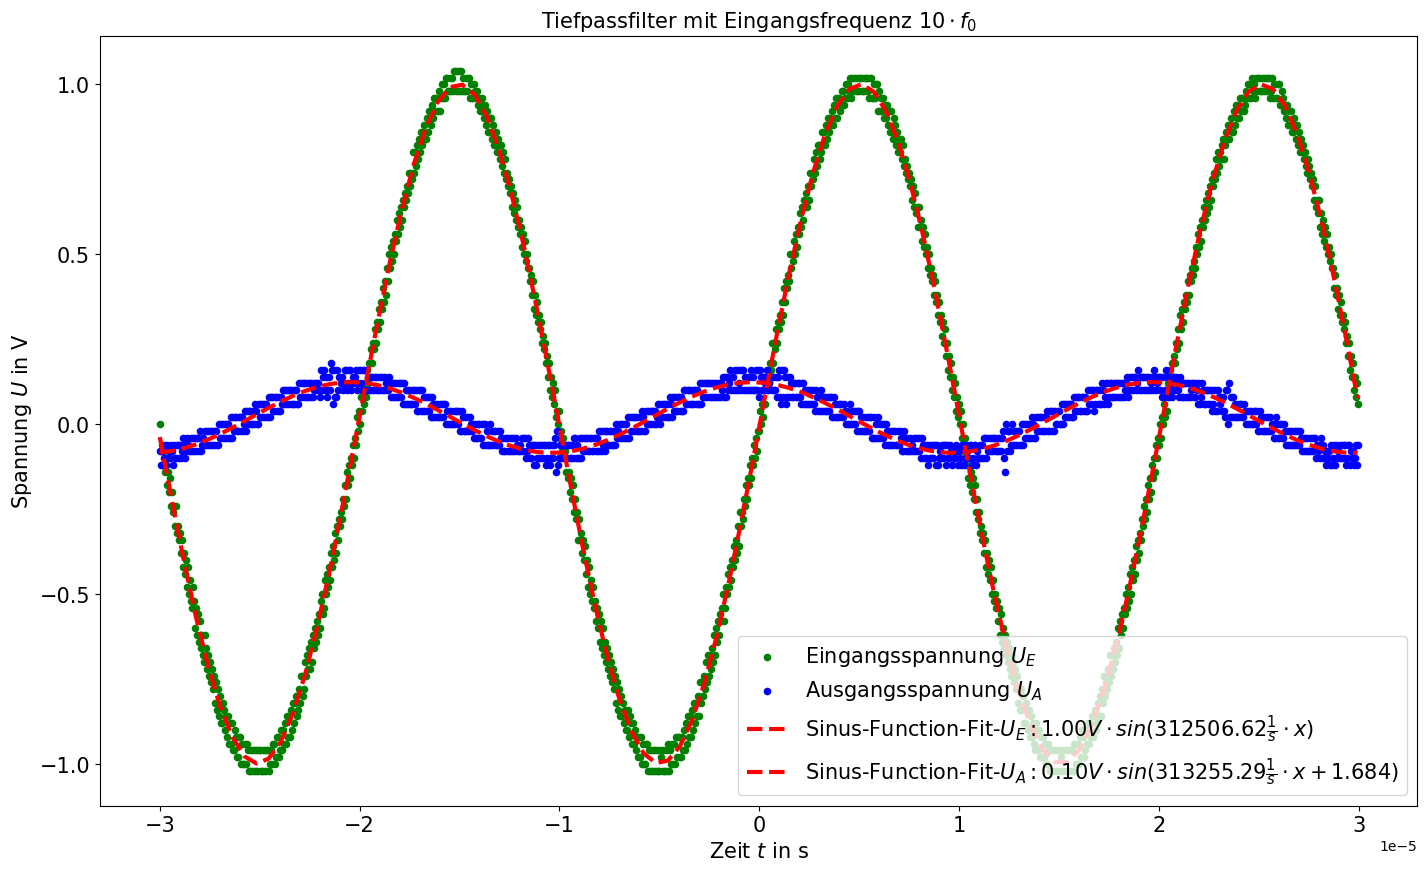

In [62]:
#Task4
#read in data
[t_tif0, ch1_tif0, ch2_tif0] = read_oscilloscope_csv_data('tif0.csv')
[t_tif01, ch1_tif01, ch2_tif01] = read_oscilloscope_csv_data('tif0_0.csv')
[t_tif10, ch1_tif10, ch2_tif10] = read_oscilloscope_csv_data('tif10.csv')

#plot data tif0
plt.subplots(1,1,figsize=(17, 10));
t_tif0 = t_tif0/1000
plt.scatter(t_tif0, ch1_tif0, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_tif0, ch2_tif0, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)

print('tif0-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif0, ch1_tif0, 100, [1, 31000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)

print('tif0-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif0, ch2_tif0, 100, [1, 31000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.2f)$' %(abs(pars[0]),pars[1], 3.14), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Tiefpassfilter mit Eingangsfrequenz $f_{0}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()

#plot data tif01
plt.subplots(1,1,figsize=(17, 10));
t_tif01 = t_tif01/1000
plt.scatter(t_tif01, ch1_tif01, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_tif01, ch2_tif01, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)

print('tif01-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif01, ch1_tif01, 100, [1, 3000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.2f)$' %(abs(pars[0]),pars[1], 3.14), zorder= 6, linewidth=3)

print('tif01-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif01, ch2_tif01, 100, [1, 3000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Tiefpassfilter mit Eingangsfrequenz $0.1\cdot f_{0}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()

#plot data tif10
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_tif10, ch1_tif10, label = r'Eingangsspannung $U_{E}$', color='green', s=20, zorder= 5)
plt.scatter(t_tif10, ch2_tif10, label = r'Ausgangsspannung $U_{A}$', color='blue', s=20, zorder= 5)

print('tif10-1:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif10, ch1_tif10, 100, [1, 300000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{E}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x)$' %(pars[0],pars[1]), zorder= 6, linewidth=3)

print('tif10-2:')
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_tif10, ch2_tif10, 100, [1, 300000, 1, 0])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit-$U_{A}: %.2f V \cdot sin( %.2f \frac{1}{s}\cdot x + %.3f)$' %(pars[0],pars[1],pars[2]), zorder= 6, linewidth=3)

#Add axis labels and a title
plt.xlabel(r'Zeit $t$ in s', fontsize=15)
plt.ylabel(r'Spannung $U$ in V', fontsize=15)
plt.title(r'Tiefpassfilter mit Eingangsfrequenz $10\cdot f_{0}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Display the plot
plt.legend(loc = 'lower right', fontsize=15).set_zorder(102)
plt.show()